![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras import backend as K
from livelossplot import PlotLossesKeras
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


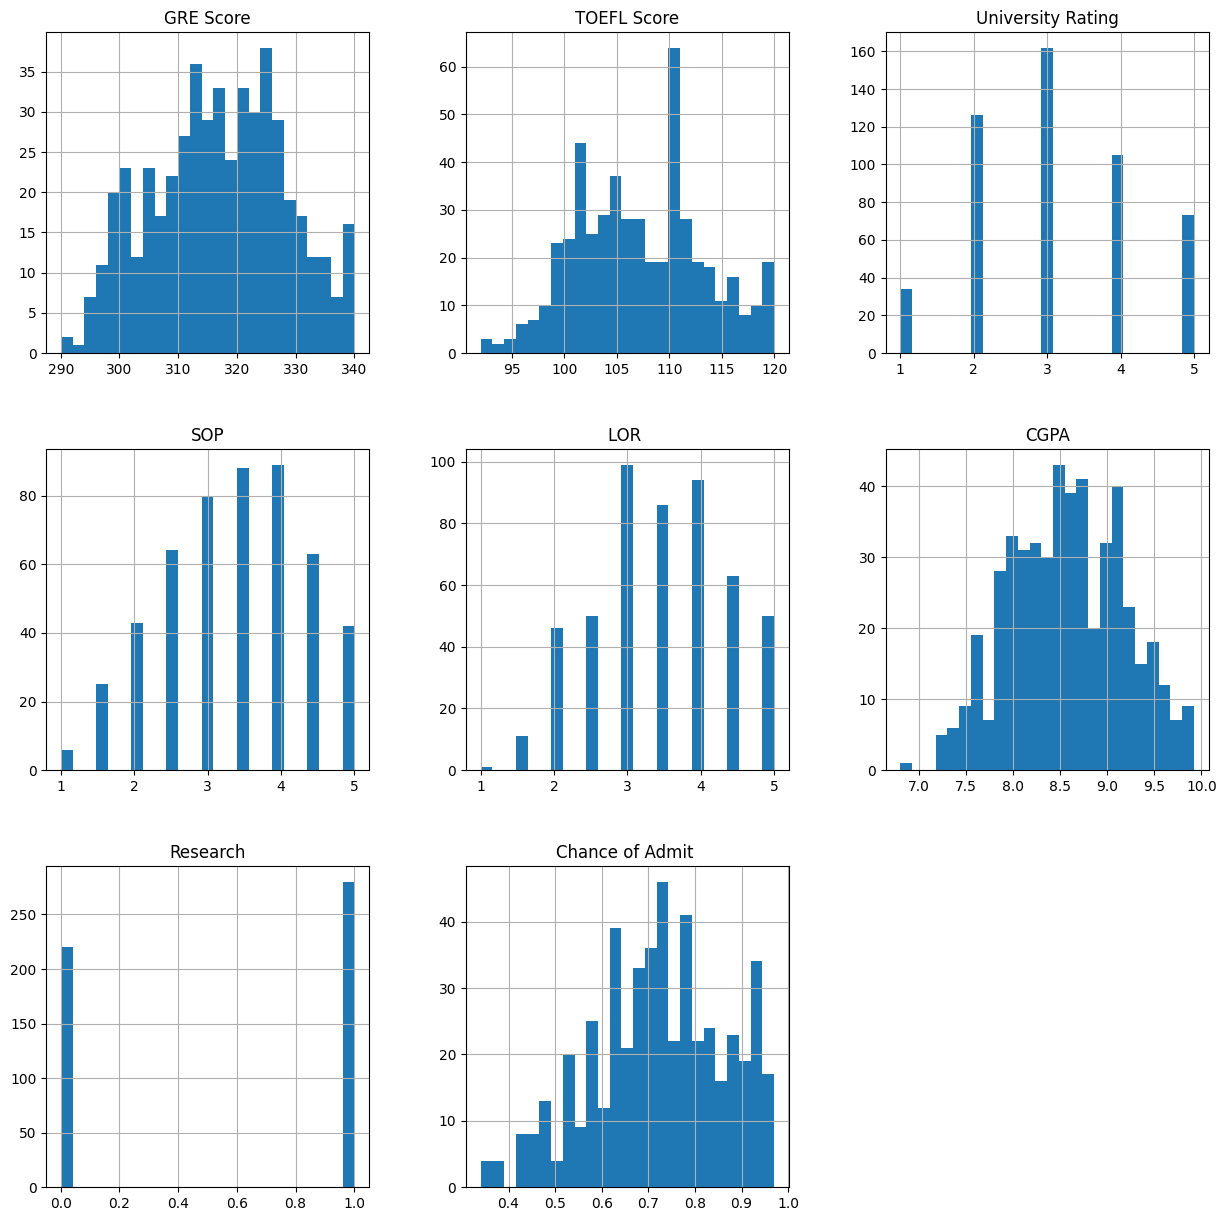

In [6]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [7]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [9]:
# Celda 1
# Preprocesamiento de datos
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler


# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = np.array(yTrain)

X_test = np.array(X_test)
Y_test = np.array(yTest)

# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

# Red neuronal de una capa
K.clear_session()
output_var = 1
# Definición red neuronal con la función Sequential()
model_1layer = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_1layer.add(Dense(output_var, input_shape=(dims,)))
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_1layer.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Impresión de la arquitectura de la red neuronal
print(model_1layer.summary())

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, verbose=1)

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model_1Layer.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

7 input variables
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


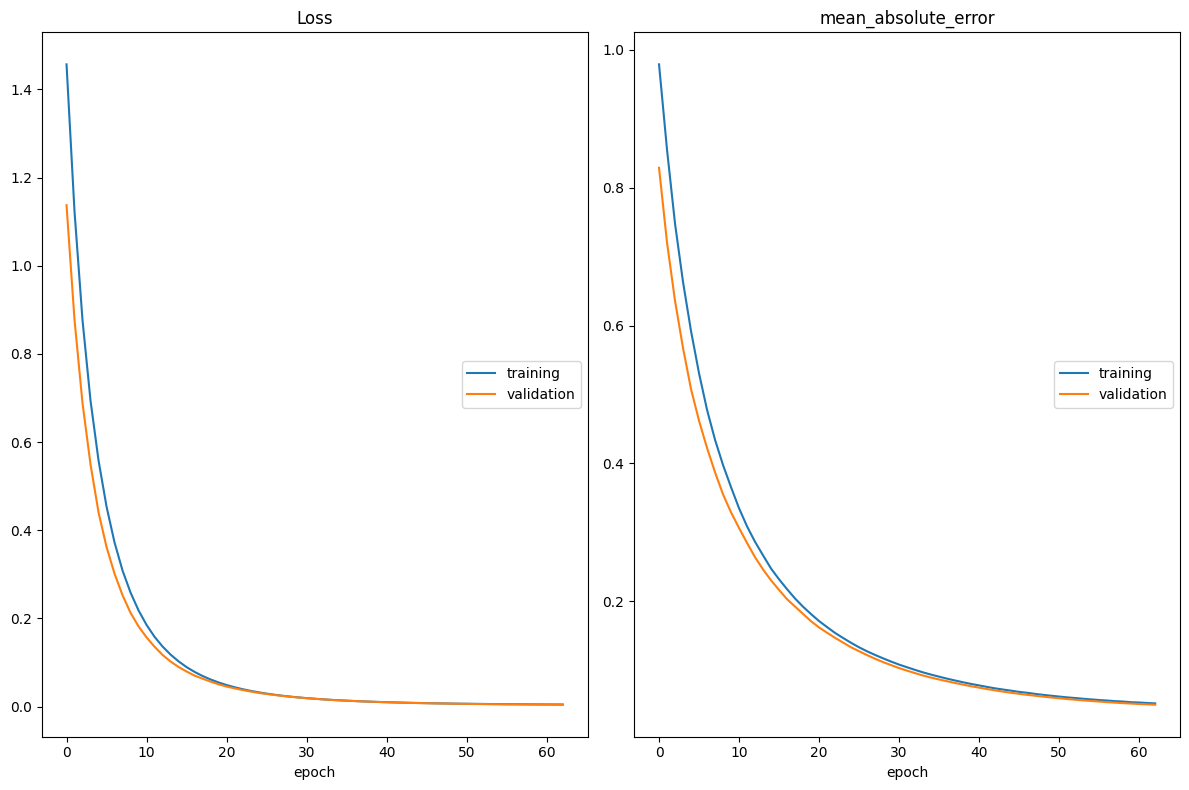

Loss
	training         	 (min:    0.005, max:    1.457, cur:    0.005)
	validation       	 (min:    0.004, max:    1.137, cur:    0.004)
mean_absolute_error
	training         	 (min:    0.052, max:    0.979, cur:    0.052)
	validation       	 (min:    0.050, max:    0.829, cur:    0.050)
11/11 [==============================] - 0s 39ms/step - loss: 0.0048 - mean_absolute_error: 0.0520 - val_loss: 0.0043 - val_mean_absolute_error: 0.0501
Epoch 63: early stopping


In [10]:
# Entrenamiento de la red neuronal con 100 épocas y early stopping
model_1layer.fit(X_train, Y_train, 
          verbose=True, 
          epochs=100,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop, PlotLossesKeras()])

5/5 [==============================] - 0s 0s/step
MSE: 0.004347438226839879
RMSE: 0.06593510617902938
MAE: 0.05008134730656942


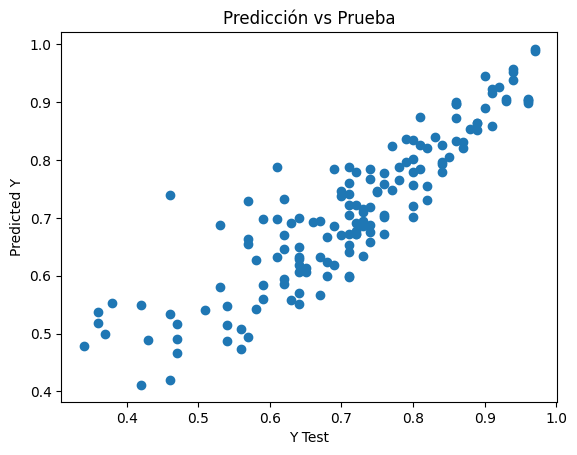

In [11]:
y_pred = model_1layer.predict(X_test)

# Calcular MSE
MSE1 = mean_squared_error(Y_test, y_pred)
print("MSE:", MSE1)

# Calcular RMSE
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred)))

RMSE1 = np.sqrt(mean_squared_error(Y_test, y_pred))
# Calcular MAE
print('MAE:', mean_absolute_error(Y_test, y_pred))

MAE1 = mean_absolute_error(Y_test, y_pred)
# Plot predicted vs actual
plt.scatter(Y_test, y_pred)
plt.title('Predicción vs Prueba')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Para el entrenamiento de esta red neuronal de una capa, se tomó el optimizador Stocastic Gradient Descent (sgd). Este optimizador se usó ya que en los videos de la clase se recomienda inicialmente, pero a través de algunas consultas se encontraron las siguientes ventajas:

1. En conjuntos de datos que no son muy grandes, el sgd evita el sobreajuste y mejora el rendimiento.
2. En redes neuronales poco profundas es muy útil ya que es suficiente para encontrar un óptimo sin añadir complejidad a los cálulos.
3. Su naturaleza estocástica permite cálculos rápidos y eficientes.

El MSE resultó en 0.004.

Para las épocas, nos apoyamos de la función de EarlyStopping para encontrar el punto en el que no se mejore la función de pérdida durante 2 épocas lo que resultó en una calibración de 46 épocas para el modelo. La razón de la elección del EarlyStopping como criterio de parada es que se desea evitar el sobreajuste, el sobreentrenamiento y lograr una mayor eficiencia computacional.

Sobre los resultados del RMSE y el MAE se tiene:

El RMSE representa la raíz cuadrada del promedio de los errores al cuadrado entre las predicciones y los valores reales. En este caso, un RMSE de 0.065 significa que, en promedio, las predicciones del modelo difieren en aproximadamente 0.065 unidades de los valores reales.

<!-- Por otro lado, el MAE representa el promedio de los errores absolutos entre las predicciones y los valores reales. Con un MAE de 0.052 se puede afirmar que, en promedio, las predicciones del modelo difieren en aproximadamente 0.050 unidades de los valores reales. -->

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [12]:
# Celda 2
# Red neuronal dos una capas
K.clear_session()

# Definición red neuronal con la función Sequential()
model_2layers = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2layers.add(Dense(100, input_shape=(dims,),activation='relu'))
model_2layers.add(Dense(100,activation='relu'))
model_2layers.add(Dense(output_var))
model_2layers.add(Activation('relu'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2layers.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Impresión de la arquitectura de la red neuronal
print(model_2layers.summary())

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, verbose=1)

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model_taller_dos_capas.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 11,001
Trainable params: 11,001
Non-trainable params: 0
_________________________________________________________________
None


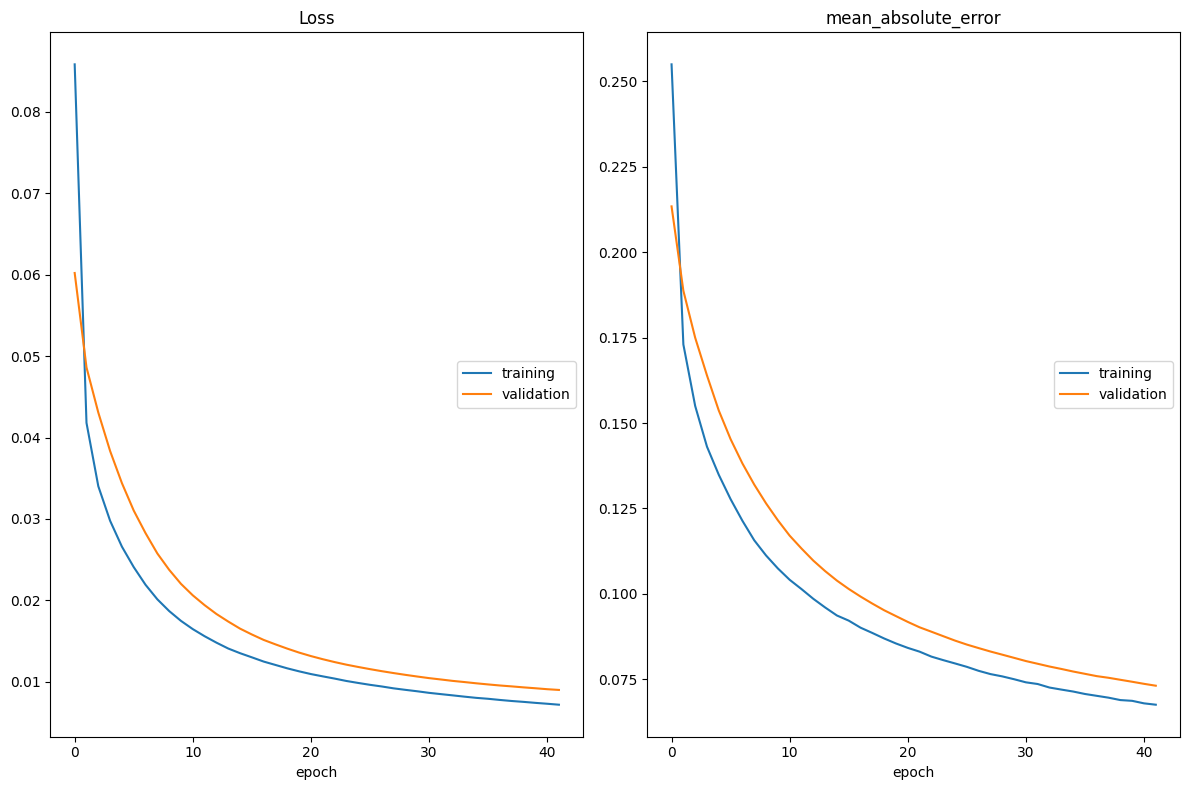

Loss
	training         	 (min:    0.007, max:    0.086, cur:    0.007)
	validation       	 (min:    0.009, max:    0.060, cur:    0.009)
mean_absolute_error
	training         	 (min:    0.068, max:    0.255, cur:    0.068)
	validation       	 (min:    0.073, max:    0.213, cur:    0.073)
11/11 [==============================] - 0s 39ms/step - loss: 0.0072 - mean_absolute_error: 0.0675 - val_loss: 0.0090 - val_mean_absolute_error: 0.0731
Epoch 42: early stopping


In [13]:
# Entrenamiento de la red neuronal con 100 épocas y early stopping
model_2layers.fit(X_train, Y_train, 
          verbose=True, 
          epochs=100,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop, PlotLossesKeras()])

5/5 [==============================] - 0s 2ms/step
MSE: 0.008996985044137998
RMSE: 0.09485243826142793
MAE: 0.07310511029561362


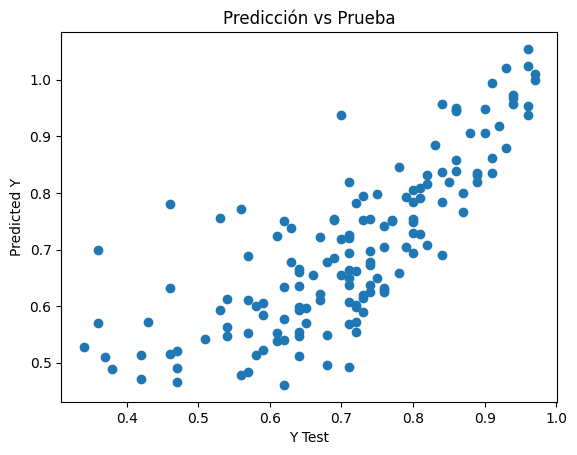

In [14]:
y_pred_2l = model_2layers.predict(X_test)
# Calcular MSE
MSE2 = mean_squared_error(Y_test, y_pred_2l)
print("MSE:", MSE2)

# Calcular RMSE
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred_2l)))
RMSE2 = np.sqrt(mean_squared_error(Y_test, y_pred_2l))

# Calcular MAE
print('MAE:', mean_absolute_error(Y_test, y_pred_2l))
MAE2 = mean_absolute_error(Y_test, y_pred_2l)

# Plot predicted vs actual
plt.scatter(Y_test, y_pred_2l)
plt.title('Predicción vs Prueba')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

En el segundo caso se construyó la red neuronal con dos capas, añadiendo la función de activación tipo ReLU, que suele ser adecuada en redes neuronales con múltiples capas debido a su simplicidad y eficiencia computacional. A diferencia de algunas funciones de activación más complejas, como la sigmoide o la tangente hiperbólica, ReLU no sufre de problemas de desvanecimiento del gradiente, lo que puede facilitar el entrenamiento de redes neuronales más profundas.

Sobre la elección del SGD, en conjuntos de datos de tamaño moderado, el uso de SGD como optimizador ofrece una solución para evitar el sobreajuste y mejorar el rendimiento del modelo. Su enfoque estocástico permite un procesamiento rápido y eficiente al calcular gradientes basados en subconjuntos aleatorios de datos. Esto resulta especialmente beneficioso en redes neuronales poco profundas, donde se logra un óptimo sin agregar complejidad innecesaria a los cálculos.

En cuanto a la elección de la función de pérdida, se optó por utilizar MSE (Mean Squared Error) en un problema de regresión, específicamente para predecir la probabilidad de admisión a la universidad, una variable continua. MSE es ampliamente utilizado en problemas de regresión debido a su capacidad para medir de manera precisa las diferencias entre los valores predichos y los valores reales.

Para controlar el proceso de entrenamiento, se implementó la técnica de EarlyStopping. Esta estrategia detiene el entrenamiento cuando no se observa una mejora en la función de pérdida durante 2 épocas consecutivas. En el caso específico del modelo desarrollado, se encontró que un total de  épocas fue suficiente para lograr 35 una calibración óptima. La elección de EarlyStopping se basa en la intención de evitar el sobreajuste y el sobreentrenamiento, al tiempo que se mejora la eficiencia computacional del modelo.

Sobre el MSE, RMSE y el MAE se obtuvieron resultados mayores a los del punto 1:

-MSE: 0.008996985044137998

-RMSE: 0.09485243826142793

-MAE: 0.07310511029561362

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [15]:
# Celda 3
# Red neuronal multicapa
K.clear_session()

# Definición red neuronal con la función Sequential()
model_drop_out = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_drop_out.add(Dense(100, input_shape=(dims,),activation='relu'))
model_drop_out.add(Dropout(0.2))
model_drop_out.add(Dense(100,activation='relu'))
model_drop_out.add(Dropout(0.2))
model_drop_out.add(Dense(output_var))
model_drop_out.add(Activation('relu'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_drop_out.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Impresión de la arquitectura de la red neuronal
print(model_drop_out.summary())

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model_drop_out.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 11,001
Trainable params: 11,001
Non-traina

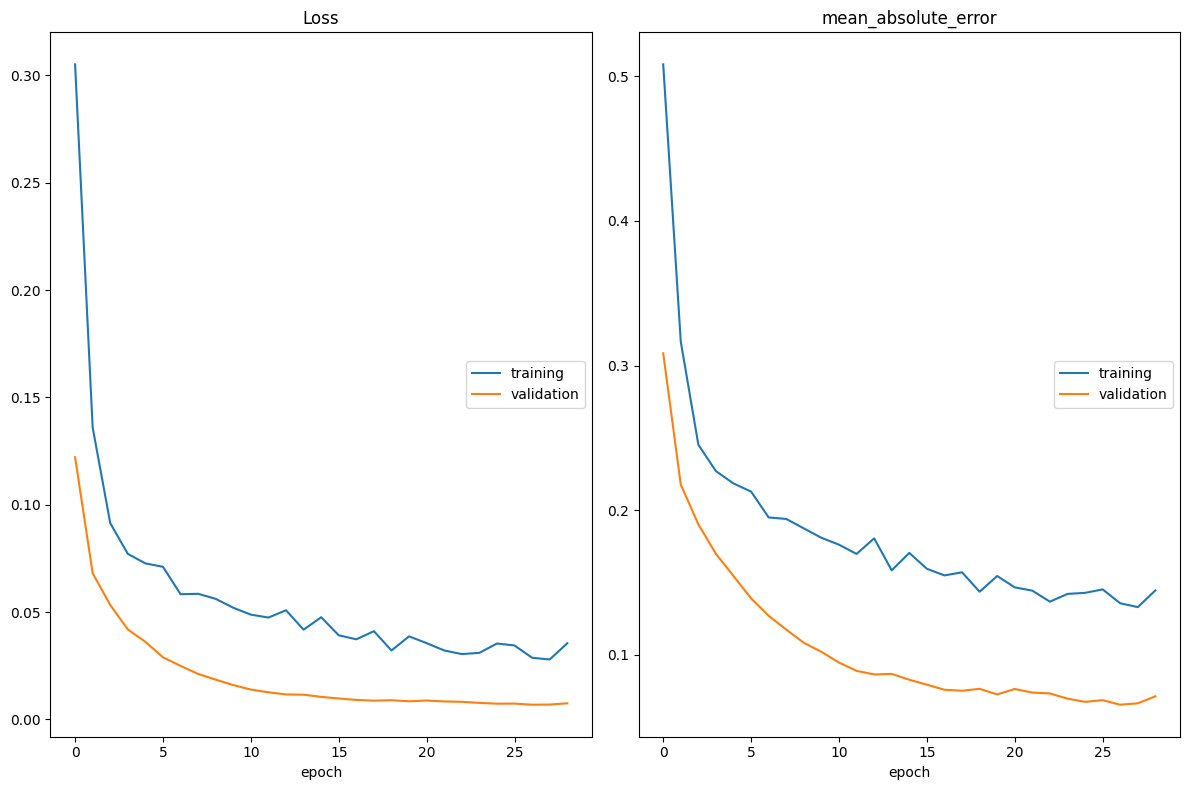

Loss
	training         	 (min:    0.028, max:    0.305, cur:    0.035)
	validation       	 (min:    0.007, max:    0.122, cur:    0.007)
mean_absolute_error
	training         	 (min:    0.133, max:    0.508, cur:    0.145)
	validation       	 (min:    0.066, max:    0.309, cur:    0.071)
11/11 [==============================] - 0s 48ms/step - loss: 0.0355 - mean_absolute_error: 0.1446 - val_loss: 0.0075 - val_mean_absolute_error: 0.0714
Epoch 29: early stopping


In [16]:
# Entrenamiento de la red neuronal con 100 épocas y early stopping y dropout
model_drop_out.fit(X_train, Y_train, 
          verbose=True, 
          epochs=100,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop, PlotLossesKeras()])

5/5 [==============================] - 0s 0s/step
MSE: 0.007472907404245896
RMSE: 0.08644597968816073
MAE: 0.07139939179420471


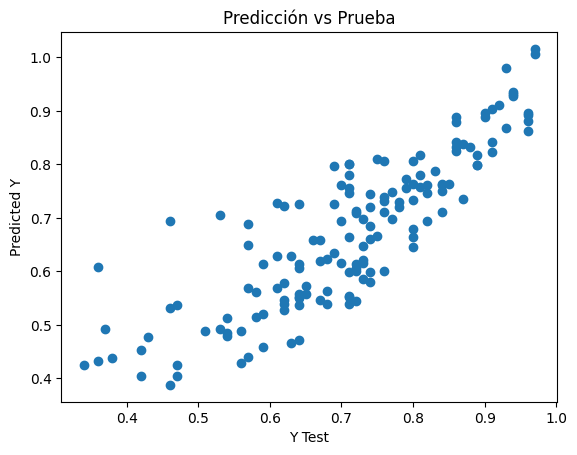

In [17]:
y_pred_drop_out = model_drop_out.predict(X_test)

# Calcular MSE
MSE3 = mean_squared_error(Y_test, y_pred_drop_out)
print("MSE:", MSE3)

# Calcular RMSE
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred_drop_out)))

RMSE3 = np.sqrt(mean_squared_error(Y_test, y_pred_drop_out))
# Calcular MAE
print('MAE:', mean_absolute_error(Y_test, y_pred_drop_out))
MAE3 = mean_absolute_error(Y_test, y_pred_drop_out)

# Plot predicted vs actual
plt.scatter(Y_test, y_pred_drop_out)
plt.title('Predicción vs Prueba')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

En este modelo se añade la utilización de Dropout. Dropout es una técnica de regularización utilizada en redes neuronales para prevenir el sobreajuste y mejorar la generalización del modelo. Consiste en aleatoriamente "apagar" (es decir, establecer a cero) un porcentaje de las unidades o neuronas en una capa durante el entrenamiento, de forma independiente para cada ejemplo de entrenamiento. Esto significa que durante cada paso de entrenamiento, algunas unidades se omiten y no contribuyen a la propagación hacia adelante ni a la propagación hacia atrás de los gradientes. Al aplicar Dropout, se fuerza al modelo a aprender características más robustas y redundantes, ya que no puede depender excesivamente de un subconjunto particular de unidades. Esto ayuda a evitar la dependencia excesiva de características específicas y promueve la co-adaptación de diferentes conjuntos de características.

En el tercer escenario, al igual que en los anteriores, hemos construido la red neuronal utilizando la función de activación ReLU, la cual es ampliamente considerada apropiada en redes neuronales con múltiples capas debido a su simplicidad y eficiencia computacional. A diferencia de funciones de activación más complejas, como la sigmoide o la tangente hiperbólica, ReLU no se ve afectada por el problema del desvanecimiento del gradiente, lo cual facilita el entrenamiento de redes neuronales más profundas.

Respecto a la elección del optimizador SGD, en conjuntos de datos de tamaño moderado, su utilización ofrece una solución para evitar el sobreajuste y mejorar el rendimiento del modelo. El enfoque estocástico de SGD permite un procesamiento rápido y eficiente al calcular gradientes basados en subconjuntos aleatorios de datos. Esto resulta especialmente beneficioso en redes neuronales poco profundas, donde se logra un rendimiento óptimo sin introducir complejidad innecesaria en los cálculos.

En cuanto a la función de pérdida seleccionada, hemos optado por utilizar MSE (Mean Squared Error) en un problema de regresión, específicamente para predecir la probabilidad de admisión a la universidad, una variable continua. MSE es ampliamente utilizado en problemas de regresión debido a su capacidad para medir de forma precisa las diferencias entre los valores predichos y los valores reales.

Para controlar el proceso de entrenamiento, hemos implementado la técnica de EarlyStopping. Esta estrategia detiene el entrenamiento cuando no se observa una mejora en la función de pérdida durante 2 épocas consecutivas. En nuestro caso particular, hemos determinado que un total de 46 épocas fue suficiente para lograr una calibración óptima del modelo. La elección de EarlyStopping se basa en la intención de evitar el sobreajuste y el sobreentrenamiento, al mismo tiempo que mejora la eficiencia computacional del modelo.

La justificación de cada una de las capas elegidas es:

Capa densa con 100 neuronas y función de activación ReLU: Esta capa es la primera capa oculta de la red y tiene como objetivo aprender representaciones y características relevantes de los datos de entrada. La elección de la función de activación ReLU (Rectified Linear Unit) se debe a su simplicidad y eficiencia computacional. ReLU proporciona una activación no lineal y evita el problema del desvanecimiento del gradiente, lo que facilita el entrenamiento de redes neuronales más profundas.

Capa Dropout: Se utiliza después de la primera capa densa para aplicar la técnica de regularización llamada Dropout. El Dropout aleatoriamente "apaga" (establece a cero) un porcentaje de las unidades en la capa durante el entrenamiento. Esto ayuda a prevenir el sobreajuste, ya que obliga a la red a aprender características más robustas y redundantes. Al desactivar un subconjunto de unidades en cada paso de entrenamiento, se evita la dependencia excesiva de características específicas y se promueve la co-adaptación de diferentes conjuntos de características.

Capa densa con 100 neuronas y función de activación ReLU: Esta es la segunda capa oculta de la red y tiene una estructura similar a la primera capa densa. Al agregar capas adicionales, la red neuronal tiene la capacidad de aprender representaciones más complejas y extraer características de mayor nivel de abstracción.

Capa Dropout: Se utiliza nuevamente después de la segunda capa densa para aplicar Dropout y regularizar la red neuronal.

Capa densa final: Esta capa tiene como objetivo producir la salida final de la red. La activación ReLU se aplica después de la capa densa para introducir la no linealidad y permitir que la red aprenda relaciones más complejas entre las características de entrada y la variable de salida.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

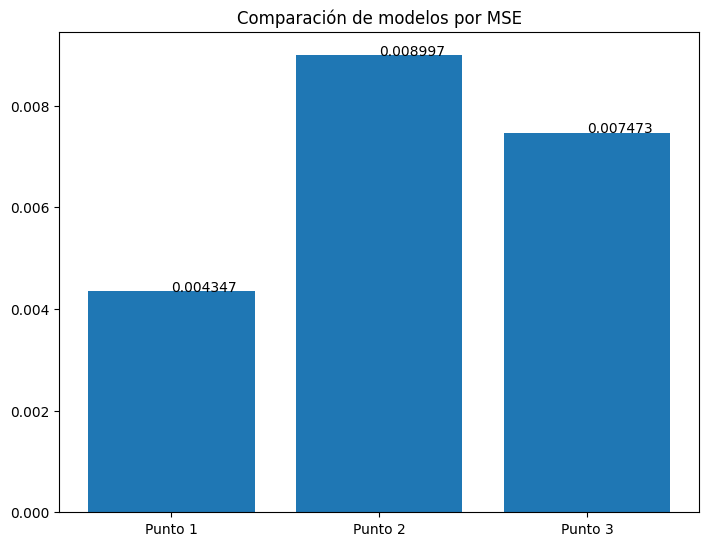

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos por MSE")
ejeX = ['Punto 1', 'Punto 2','Punto 3']
ejeY = [round(MSE1,6),round(MSE2,6),round(MSE3,6)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

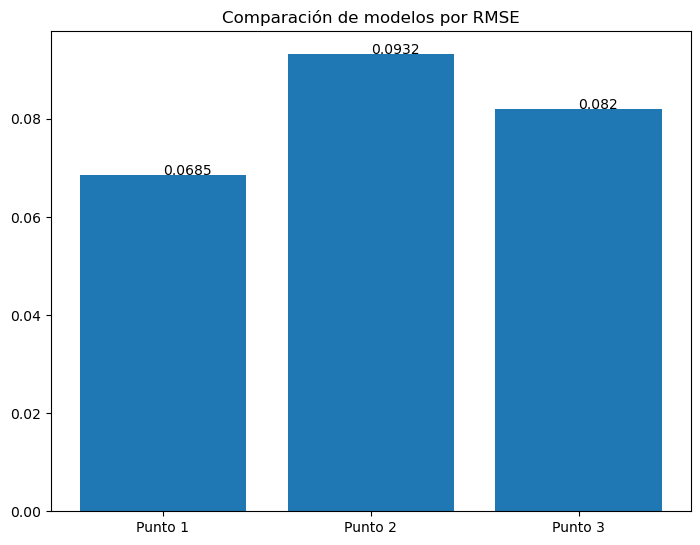

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos por RMSE")
ejeX = ['Punto 1', 'Punto 2','Punto 3']
ejeY = [round(RMSE1,4),round(RMSE2,4),round(RMSE3,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

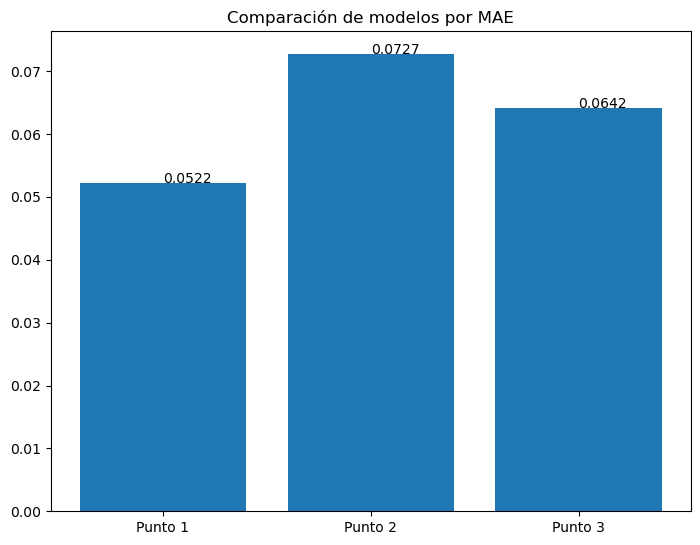

In [45]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos por MAE")
ejeX = ['Punto 1', 'Punto 2','Punto 3']
ejeY = [round(MAE1,4),round(MAE2,4),round(MAE3,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Para comparar los resultados obtenidos, se utilizó el MSE, RMSE y el MAE. El modelo con el mejor desempeño, fue el del punto 1 con una sola capa, el cual obtuvo las predicciones más ajustadas de acuerdo con estos resultados. Siendo así, la ventaja de este modelo frente a los otros dos es su parsimonia. Es decir, logró un mejor poder predictivo con una menor complejidad, implicando menos recursos computacionales y menor tiempo de procesamiento. El modelo con dos capas del punto 2 fue el que obtuvo el peor desempeño. Sus desventajas consisten en que, al añadir una capa se vuelve más complejo (además de menos interpretable) el modelo, lo cual puede valer la pena si se mejoran las predicciones, pero no es el caso. Así, es un modelo que añade tiempo de procesamiento innecesariamente. Aun así, eventualmente valdría la pena verificar si un optimizador diferente puede mejorar el resultado en estos modelos multicapa.